Index:

    1. Loading dataset
    2. Analysis of MNIST dataset
    3. Data normalization
    4. CNN model
    5. Visualizing trained model
    6. Save model
    7. Testing the model

# MNIST


Dataset contains 70000 image with 28*28 pixels with 10 different class. Keras split the dataset into two part Train set : 60,000 Test set: 10,000



In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

2022-12-26 19:53:07.569575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 19:53:07.652862: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-26 19:53:07.655802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-26 19:53:07.655809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

# Analysis of MNIST dataset


In [3]:
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_train.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (60000,)


# Plot a random Digit using matplotlib


(28, 28) 7


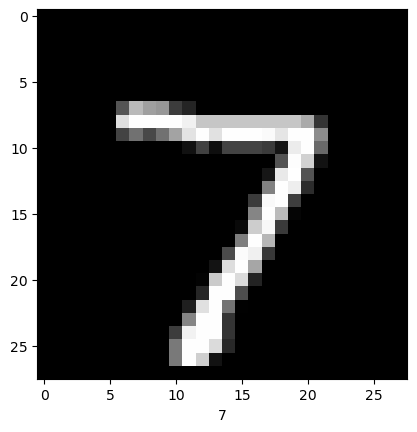

In [4]:
import matplotlib.pyplot as plt

image = x_test[0]
label = y_test[0]

print(image.shape,label)
plt.imshow(image,cmap='gray')
plt.xlabel(label)
plt.show()

# Drawing randomly 3*4=12 images

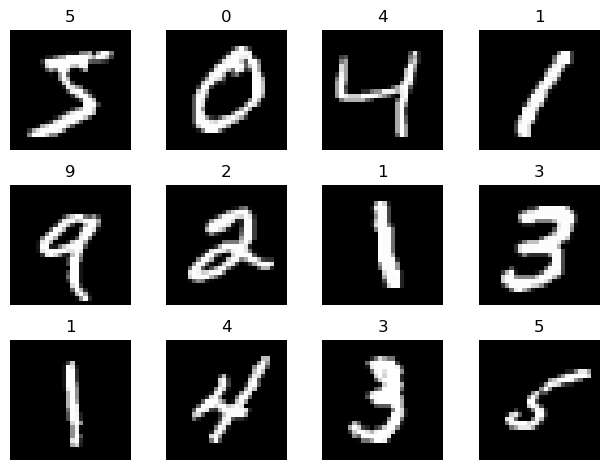

In [6]:
row= 3 
col= 4
for i in range(row*col):
    image = x_train[i]
    label = y_train[i]
    plt.subplot(row,col,i+1)
    plt.imshow(image,cmap='gray')
    plt.title(label)
    plt.axis('off')
    
plt.tight_layout()
plt.savefig('mnist_plot_12.png')
plt.show()

# Data normalization
## Convert int to float32

In [7]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [8]:

x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
print('New shape of dataset')
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

New shape of dataset
x_train shape (60000, 28, 28, 1)
y_train shape (60000,)
x_test shape (10000, 28, 28, 1)
y_test shape (10000,)


In [10]:

print(x_train[0])
print(y_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

# Convolutional Neural Network (CNN) Model
# Sequential API is the easier to create the Keras model Adds layers sequentially to build the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [13]:
# Create the model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))
         

2022-12-26 20:26:21.956772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-26 20:26:21.956786: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-26 20:26:21.956799: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nsl47): /proc/driver/nvidia/version does not exist
2022-12-26 20:26:21.957891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          36928     
                                                        


Compile a model
For the training of a model, we have to define the learning process we need to specify an optimizer, a loss function and optionally metrics like accuracy

the loss function is a measure on how good our model is at achieving the given objective An optimizer is used to minimize the loss function by updateing the weight using the gradient



In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


In [17]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          36928     
                                                        

## Train or Fit the model
an epoch refers to one cycle through the full training dataset. Mostly, training a neural network takes more than a few epochs batch size is a number that is used to divided the dataset among the total dataset

In [18]:
from tensorflow.keras.utils import to_categorical


In [19]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [20]:

y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:

history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0389 - accuracy: 0.9891
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0361 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0323 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0294 - accuracy: 0.9915


Evaluating model
test the model using x_test and y_test

loss value, accuracy value =model.evaluate()

In [25]:
score=model.evaluate(x_test,y_test)
print(score)

313/313 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9936
[0.02070697955787182, 0.9936000108718872]


In [26]:
print("Accuracy of the model is : ",score[1]*100)

Accuracy of the model is :  99.36000108718872


Visualizing the training process
we can visualize our training and testing accuracy and loss for each epoch so we can analyze our performance of our model. the accuracy value and loss values are saved into the history variable we can used matplotlib to plot the data

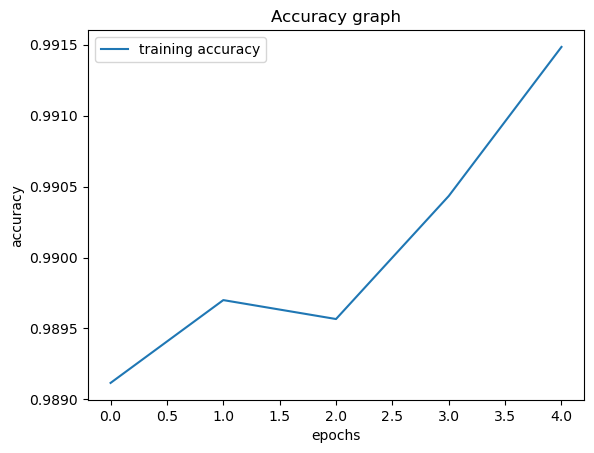

In [27]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy graph')
plt.legend()

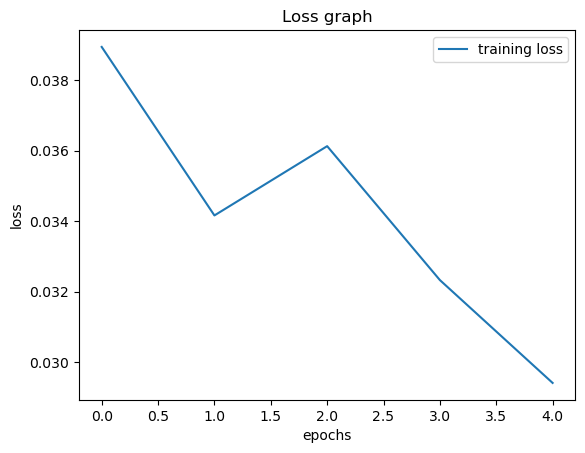

In [28]:
plt.plot(history.history['loss'],label='training loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss graph')
plt.legend()

# Save and load model


In [29]:

import os
model_name='mnist_keras.h5'
model.save(model_name)
print('model save to: ',os.getcwd)

model save to:  <built-in function getcwd>


In [30]:
from tensorflow.keras.models import load_model
loaded_model=load_model(model_name)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          36928     
                                                        


# Testing a single image

label [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


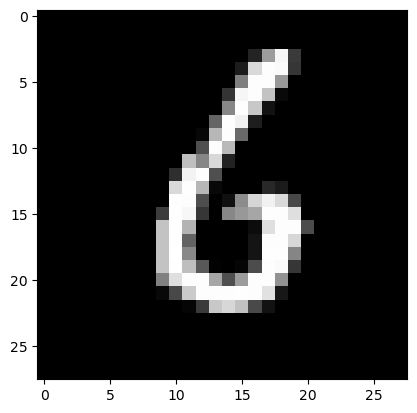

In [32]:
index=50
test_image=x_test[index].reshape(28,28)
print('label',y_test[index])
plt.imshow(test_image,cmap='gray')

In [33]:
test_image=test_image.reshape(1,28,28,1) # reshape for prediction
prediction=loaded_model.predict(test_image)
print(prediction)

1/1 [==============================] - 0s 58ms/step
[[1.4655635e-08 2.6126121e-10 5.0048087e-11 2.2287729e-10 1.5957961e-11
  4.0845357e-06 9.9999595e-01 1.0082196e-15 5.3542046e-09 1.3272936e-11]]


In [34]:
print('prediction length: ',len(prediction[0]))

prediction length:  10


In [35]:

# argmax() show the best prediction value on the categorial values
print('Best prediction: ',prediction.argmax())

Best prediction:  6
